In [72]:
%pip install opencv-python
%pip install numpy
%pip install matplotlib
%pip install ipympl
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# **Lab 2.1 Image Enhancement with Math Operation**
This lab consists of two main subparts: Image Pixel Adjustment using Linear Equations and Gamma Equations.

In [73]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

Read an image using OpenCV (Use your own image).

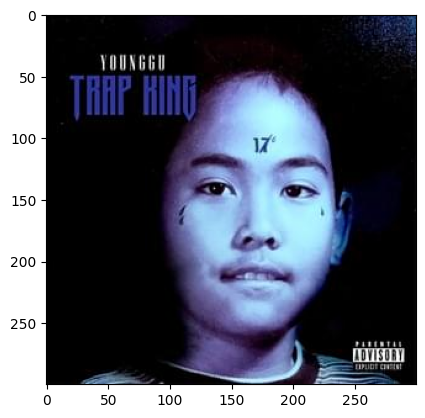

In [74]:
### START CODE HERE ###
img = cv2.imread("./assets/TrapKing.jpg")


plt.imshow(img)
### END CODE HERE ###

## **Image Pixel Adjustment**

### Using Linear Equation
$$I_{new} = I \cdot a + b$$

Please perform at ***least 20 iterations*** with varying values of $a$ and $b$.
Assign the result of each iteration to an array.<br/>

In [75]:
### START CODE HERE ###
a_vals = np.linspace(0, 1, 40)
b_vals = a_vals * 100
lin_result = []

for a, b in zip(a_vals, b_vals):
    new_img = img.astype(np.float64) * a + b
    new_img = np.clip(new_img, 0, 255).astype(np.uint8)
    lin_result.append(new_img)

### END CODE HERE ###

Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The reference output used 40 iterations.

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/1-1.png?raw=true)
</details>


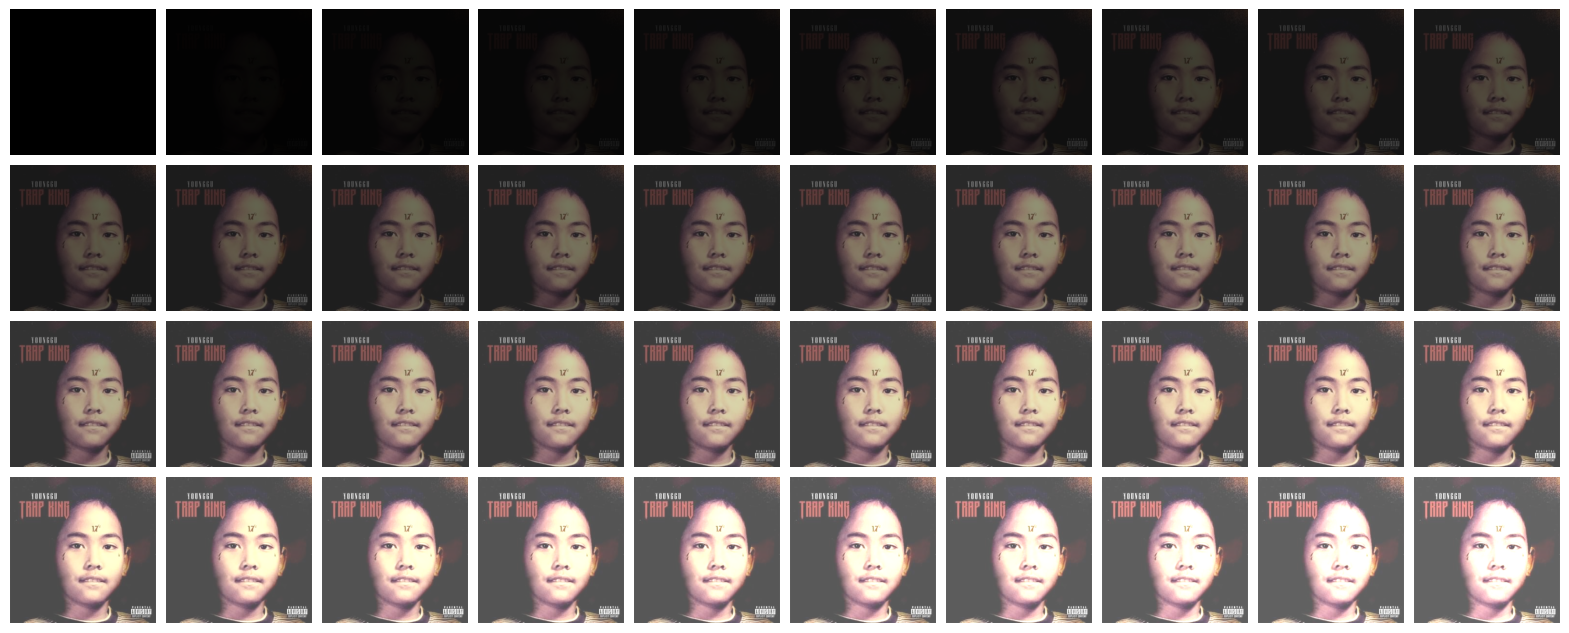

In [76]:
### START CODE HERE ###
fig = plt.figure(figsize=(20, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 10), axes_pad=0.1)

for ax, im in zip(grid, lin_result):
    ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    ax.axis("off")

plt.show()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [77]:
assert len(lin_result) >= 20, f"Expected more than or equal 20 iterations but got {len(lin_result)}"
for idx, result in enumerate(lin_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Save the array of images to a video. Please complete the function below.

In [82]:
### START CODE HERE ###
def write_images_to_video(image_array, output_file, frame_rate=30):
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    height, width, channels = image_array[0].shape
    out = cv2.VideoWriter(output_file, fourcc, frame_rate, (width, height))
    for frame in image_array:
        out.write(frame)

    out.release()


### END CODE HERE ###

Use `write_images_to_video()` and save the result.

In [84]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_linear.mp4")
write_images_to_video(lin_result,output_file, 60)

Now use `matplotlib.animation` to display the animation from the images array.

In [85]:
%%capture
### START CODE HERE ###
fig, axs = plt.subplots()

frames = []

for i, frame in enumerate(lin_result):
    frame_uint8 = frame.astype(np.uint8)
    frame_rgb = cv2.cvtColor(frame_uint8, cv2.COLOR_BGR2RGB)

    im = axs.imshow(frame_rgb, animated=True)
    axs.axis("off")

    if i == 0:
        frame_rgb = cv2.cvtColor(frame_uint8, cv2.COLOR_BGR2RGB)
        im = axs.imshow(frame_rgb)

    frames.append([im])

ani = animation.ArtistAnimation(
    fig=fig,
    artists=frames,
    interval=50,
    blit=True,
)
### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![linear.gif](![<attachment:linear (2).gif>](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/linear.gif?raw=true))

</details>

In [89]:
from IPython.display import HTML
HTML(ani.to_jshtml())

### Gamma Equation
$$I_{new} = I^{\gamma} \cdot a + b$$

Where $a$ is 1 and $b$ is 0. 
Please perform ***at least 10 iterations*** for 0 < $\gamma$ < 1 and another ***at least 10 iterations*** for $\gamma$ > 1
Assign the result of each iteration to an array.<br/>


In [139]:
### START CODE HERE ###
a = 1
b = 0
step = 10
gamma = np.concatenate([np.linspace(0.1, 0.9, step), np.linspace(1.1, 2.0, step)])

gam_result = []
for gam in gamma:
    print(gam)
    new_img = ((img.astype(np.float64) ** gam) * a) + b
    new_img = np.clip(new_img, 0, 255).astype(np.uint8)
    gam_result.append(new_img)
### END CODE HERE ###

0.1
0.18888888888888888
0.2777777777777778
0.3666666666666667
0.4555555555555556
0.5444444444444445
0.6333333333333333
0.7222222222222222
0.8111111111111111
0.9
1.1
1.2000000000000002
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.8
1.9
2.0


Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/1-2.png?raw=true)
</details>

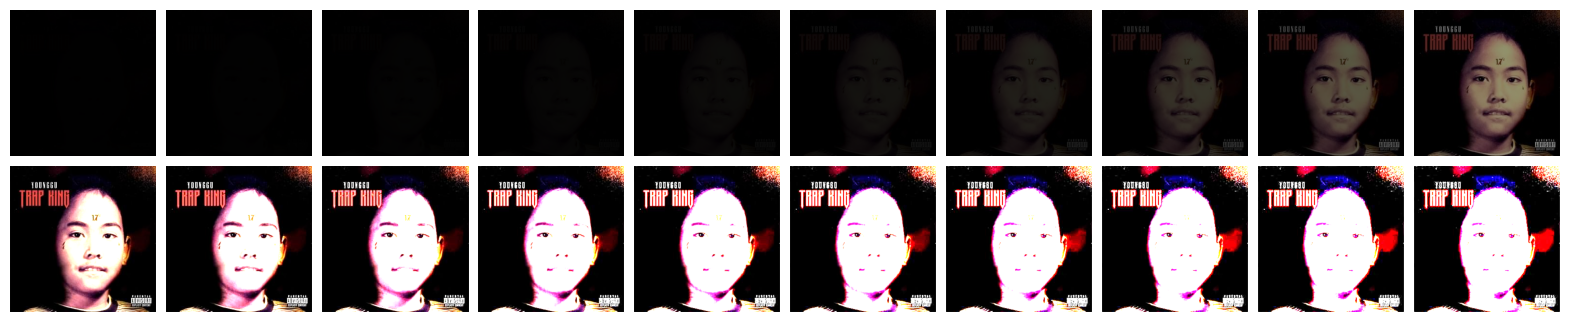

In [140]:
### START CODE HERE ###

fig = plt.figure(figsize=(20, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 10), axes_pad=0.1)

for ax, im in zip(grid, gam_result):
    ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    ax.axis("off")

plt.show()
### END CODE HERE ###

In [141]:
assert len(gam_result) >= 20, f"more than or equal 20 iterations but got {len(gam_result)}"
for idx, result in enumerate(gam_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Use `write_images_to_video()` and save the result.

In [142]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_gamma.mp4")
write_images_to_video(gam_result,output_file)

Now use `matplotlib.animation` to display the animation from the images array.

In [145]:
%%capture
### START CODE HERE ###
fig, axs = plt.subplots()

frames = []

for i, frame in enumerate(gam_result):
    frame_uint8 = frame.astype(np.uint8)
    frame_rgb = cv2.cvtColor(frame_uint8, cv2.COLOR_BGR2RGB)

    im = axs.imshow(frame_rgb, animated=True)
    axs.axis("off")

    if i == 0:
        frame_rgb = cv2.cvtColor(frame_uint8, cv2.COLOR_BGR2RGB)
        im = axs.imshow(frame_rgb)

    frames.append([im])

ani = animation.ArtistAnimation(
    fig=fig,
    artists=frames,
    interval=50,
    blit=True,
)
### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![gamma2.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/gamma.gif?raw=true)

</details>

In [146]:
HTML(ani.to_jshtml())

---

## **Questions**
1. If an image having over brightness or saturation, what would be possible solutions to enhance the image.
2. How can we make an image reverse intensity (black-to-white, white-to-black)? Explain the process

## **Answer**

1. Darkens the image using non-linear function like Gamma
2. np.max(img)(Assume as White color) subtracts with original value to get reverse intensity 